# IFN695 - Report Code

Importing all relevant libraries

In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

pd.set_option('display.max_rows', 100)

Importing Datasets

In [3]:
renewable_penetration = pd.read_csv('data/NEM_RENEWABLE_PENETRATION_ALL_202508041827.csv')
renewable_penetration

,DateTime,Max/Min,State,Fuel Type,Supply
0,2/1/2018 4:00,Min,NEM,Battery,0.000
1,2/1/2018 4:00,Min,NEM,Biomass,10.233
2,2/1/2018 4:00,Min,NEM,Black coal,10655.808
3,2/1/2018 4:00,Min,NEM,Brown coal,4655.597
4,2/1/2018 4:00,Min,NEM,Distributed PV,0.000
...,...,...,...,...,...
1858,3/8/2025 11:30,Max,NEM,Gas,258.971
1859,3/8/2025 11:30,Max,NEM,Hydro,586.385
1860,3/8/2025 11:30,Max,NEM,Liquid Fuel,0.000
1861,3/8/2025 11:30,Max,NEM,Utility-scale Solar,5725.921


In [4]:
renewable_penetration.dtypes

DateTime      object
Max/Min       object
State         object
Fuel Type     object
Supply       float64
dtype: object

Having a look at the different fuel types in the dataset

In [8]:
renewable_penetration['Fuel Type'].value_counts()

Fuel Type
Battery                184
Biomass                184
Black coal             184
Brown coal             184
Distributed PV         184
Gas                    184
Hydro                  184
Liquid Fuel            184
Utility-scale Solar    184
Wind                   184
Other                   23
Name: count, dtype: int64

There is an 'Other' value for Fuel Type. Going to remove that for easier analysis

In [10]:
renewable_penetration = renewable_penetration[renewable_penetration['Fuel Type'] != 'Other']
renewable_penetration

,DateTime,Max/Min,State,Fuel Type,Supply
0,2018-01,Min,NEM,Battery,0.000
1,2018-01,Min,NEM,Biomass,10.233
2,2018-01,Min,NEM,Black coal,10655.808
3,2018-01,Min,NEM,Brown coal,4655.597
4,2018-01,Min,NEM,Distributed PV,0.000
...,...,...,...,...,...
1858,2025-08,Max,NEM,Gas,258.971
1859,2025-08,Max,NEM,Hydro,586.385
1860,2025-08,Max,NEM,Liquid Fuel,0.000
1861,2025-08,Max,NEM,Utility-scale Solar,5725.921


The Supply column is the only column that has the correct format. Going to change the:
- DateTime to a Date Object - as this will be a monthly average, min and max 
- FuelType to a category 
- Max/Min transposed into their own variables with a calculated monthly average

Converting the Date Column

In [11]:
# Converting the DateTime column
renewable_penetration['DateTime'] = pd.to_datetime(renewable_penetration['DateTime'], format='mixed', dayfirst=True)
renewable_penetration['DateTime'] = renewable_penetration['DateTime'].dt.strftime('%Y-%m')

Creating the Groupby's to calculate the min, max and mean supply amounts

In [63]:
mean_supply = renewable_penetration.groupby(['Fuel Type', 'DateTime'])['Supply'].mean().reset_index()
min_supply = renewable_penetration.groupby(['Fuel Type', 'DateTime'])['Supply'].min().reset_index()['Supply']
max_supply = renewable_penetration.groupby(['Fuel Type', 'DateTime'])['Supply'].max().reset_index()['Supply']

# Adding the min and max supplies to the mean supply groupby
mean_supply['Min Supply (MW)'] = min_supply
mean_supply['Max Supply (MW)'] = max_supply

In [65]:
mean_supply.columns = ['Fuel Type', 'Month', 'Mean Supply (MW)', 'Min Supply (MW)', 'Max Supply (MW)']
mean_supply

,Fuel Type,Month,Mean Supply (MW),Min Supply (MW),Max Supply (MW)
0,Battery,2018-01,0.2830,0.000,0.566
1,Battery,2018-02,0.6665,0.000,1.333
2,Battery,2018-03,2.8665,0.000,5.733
3,Battery,2018-04,4.8250,0.000,9.650
4,Battery,2018-05,3.0330,2.550,3.516
...,...,...,...,...,...
915,Wind,2025-04,2027.1265,1279.964,2774.289
916,Wind,2025-05,3007.9465,1232.864,4783.029
917,Wind,2025-06,3260.6030,1857.128,4664.078
918,Wind,2025-07,3395.3705,1422.093,5368.648


Generating the new dataframe with the supplies, sorted by months

In [68]:
supply_summary = mean_supply.sort_values(by = 'Month').reset_index(drop = True)
supply_summary

,Fuel Type,Month,Mean Supply (MW),Min Supply (MW),Max Supply (MW)
0,Battery,2018-01,0.2830,0.000,0.566
1,Liquid Fuel,2018-01,0.0595,0.021,0.098
2,Black coal,2018-01,12383.7065,10655.808,14111.605
3,Hydro,2018-01,1122.2300,355.826,1888.634
4,Biomass,2018-01,12.3745,10.233,14.516
...,...,...,...,...,...
915,Black coal,2025-08,9114.7900,6399.196,11830.384
916,Biomass,2025-08,40.5620,35.100,46.024
917,Battery,2025-08,7.2425,2.324,12.161
918,Utility-scale Solar,2025-08,2863.1915,0.462,5725.921


In [72]:
battery_summary = supply_summary[supply_summary['Fuel Type'] == 'Battery']

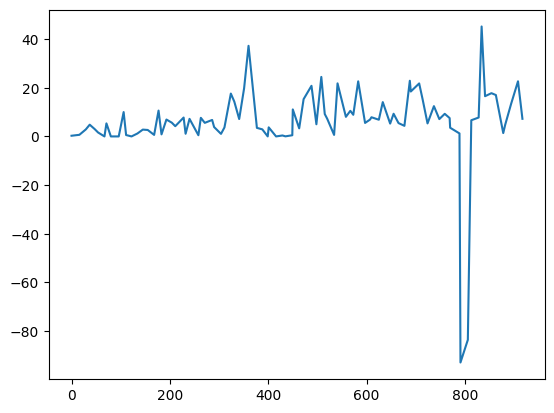

In [73]:
fig, ax = plt.subplots()
ax.plot(battery_summary['Mean Supply (MW)'])

In [76]:
supply_summary[supply_summary['Month'] == '2018-01']

,Fuel Type,Month,Mean Supply (MW),Min Supply (MW),Max Supply (MW)
0,Battery,2018-01,0.2830,0.000,0.566
1,Liquid Fuel,2018-01,0.0595,0.021,0.098
2,Black coal,2018-01,12383.7065,10655.808,14111.605
3,Hydro,2018-01,1122.2300,355.826,1888.634
4,Biomass,2018-01,12.3745,10.233,14.516
5,Wind,2018-01,1715.5270,566.570,2864.484
6,Brown coal,2018-01,4597.9545,4540.312,4655.597
7,Gas,2018-01,1712.7820,1517.622,1907.942
8,Distributed PV,2018-01,1938.2870,0.000,3876.574
9,Utility-scale Solar,2018-01,134.7040,2.204,267.204


In [80]:
mean_supply_amounts = supply_summary.groupby(['Month'])['Mean Supply (MW)'].sum().reset_index()['Mean Supply (MW)']

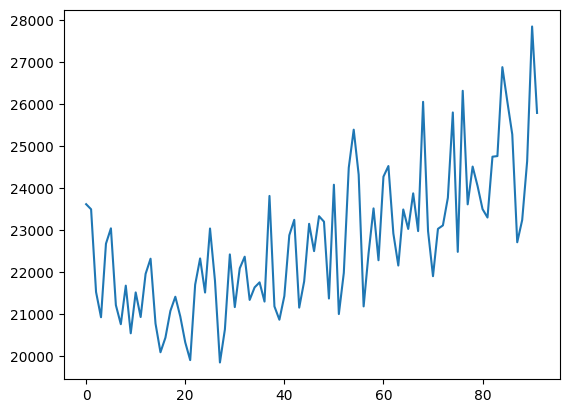

In [84]:
fig, ax = plt.subplots()

ax.plot(mean_supply_amounts)